In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils


In [2]:
# load the image and resize it to a smaller factor so that the shapes can be approximated better
image = cv2.imread("page_1.png")
#resized = imutils.resize(image, width=300)
#ratio = image.shape[0] / float(resized.shape[0])

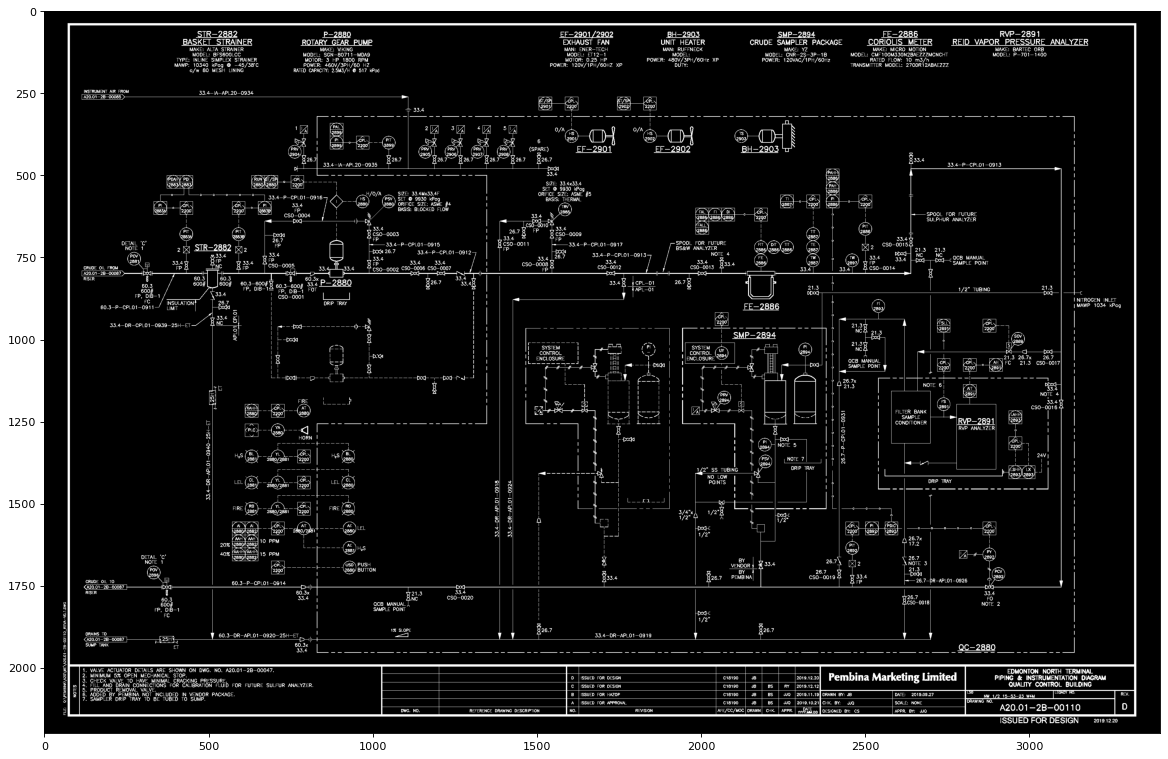

True

In [3]:
# convert the resized image to grayscale, blur it slightly, and threshold it
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#blurred = cv2.GaussianBlur(gray, (1, 1), 0)
binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
edge = cv2.Canny(gray, 100, 200)

kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(binary, kernel, iterations = 1)
dilation = cv2.dilate(binary, kernel, iterations = 2)
closing = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)

num_labels, labels_im = cv2.connectedComponents(binary)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(binary, cmap='gray')
plt.show()

cv2.imwrite("pid4.png", edge)
#cv2.imshow("thresh", dilation)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

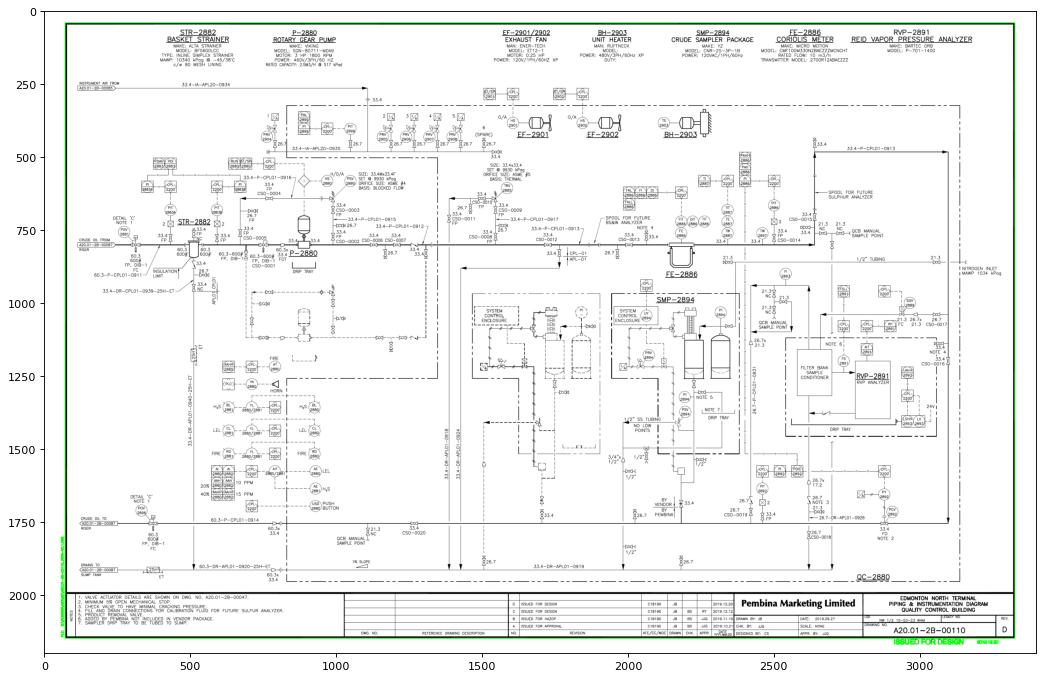

In [4]:
# find border contours in the binary image
contours, hierarchy = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# contours = imutils.grab_contours((contours))
# draw all contours
all_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

#cv2.imshow("contours", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(all_contours)
plt.show()

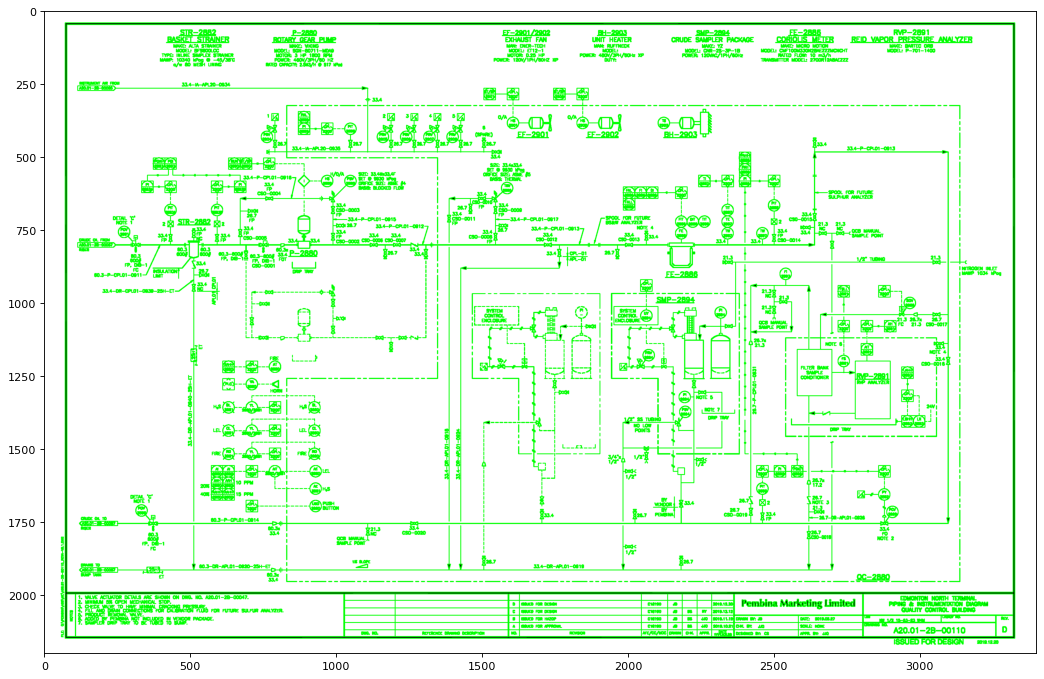

7318

In [5]:
# find contours in the thresholded image and initialize the shape detector
#contours = cv2.findContours(binary.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(binary.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#contours = imutils.grab_contours((contours, hierarchy))
# draw all contours
all_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

#cv2.imshow("contours", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(all_contours)
plt.show()

len(contours)
#hierarchy[0,2]

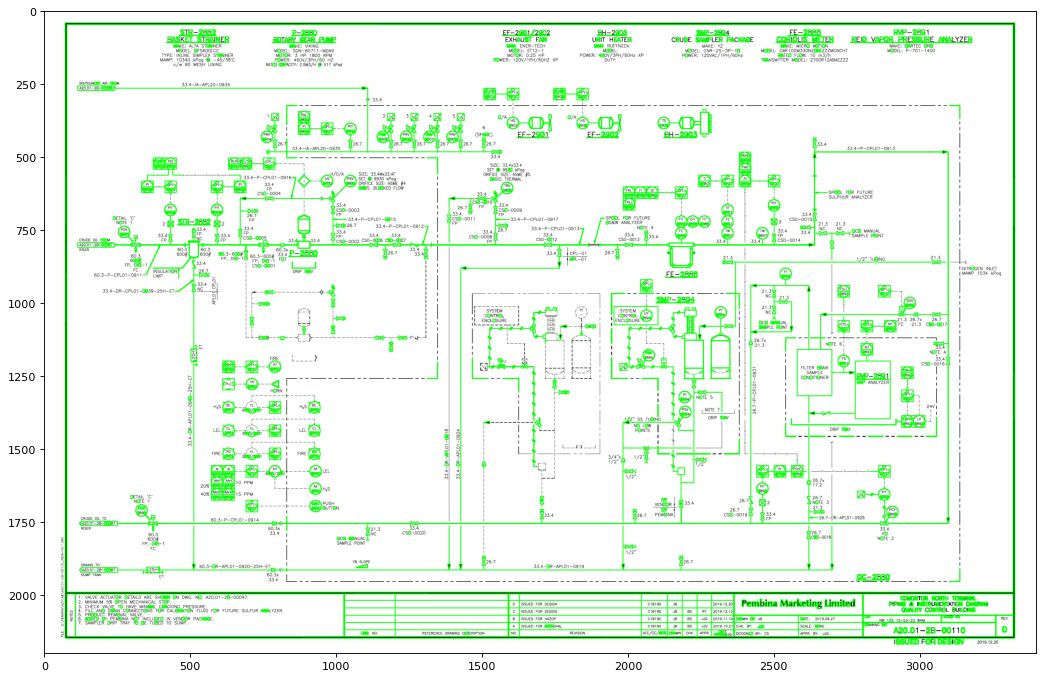

True

In [6]:
contours = imutils.grab_contours((contours, hierarchy))
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:1000]

# draw all contours
some_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

#cv2.imshow("contours", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(some_contours)
plt.show()

cv2.imwrite("pid4.png", some_contours)

In [7]:
square_contours = []

# loop over our contours
for contour in contours:
    # approximate the contour
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.025 * peri, True)
    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        square_contours.append(approx)
        

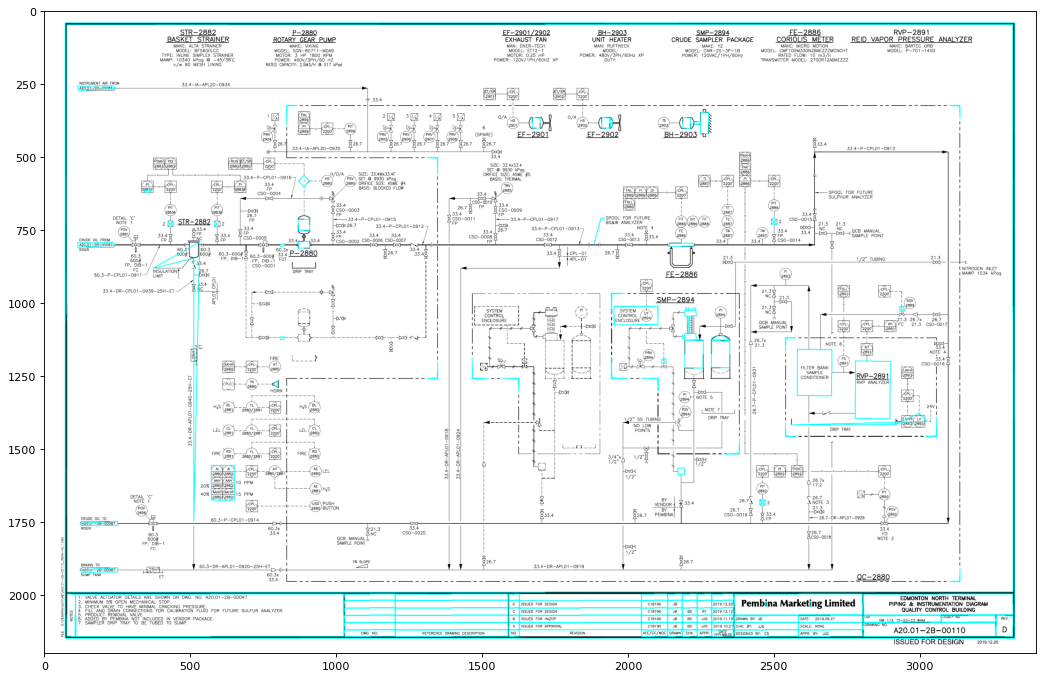

In [8]:
select_contours = cv2.drawContours(image.copy(), square_contours, -1, (0, 255, 255), 2)

#cv2.imshow("contours", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(select_contours)
plt.show()

In [172]:
cv2.imwrite("pid4.png", select_contours)

True

In [94]:
screenCnt

array([[[1698, 1393]],

       [[1701, 1398]],

       [[1698, 1401]],

       [[1695, 1395]]], dtype=int32)